In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
training_set=train_datagen.flow_from_directory('D:/cat and dog/train',
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 557 images belonging to 2 classes.


In [10]:
test_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_set=test_datagen.flow_from_directory('D:/cat and dog/test',
                                          target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 140 images belonging to 2 classes.


In [11]:
cnn=tf.keras.models.Sequential()

First Layer

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',
                               input_shape=[64,64,3]))

Pooling

In [16]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

Second Layer

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',
                               input_shape=[64,64,3]))

In [18]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

Flattening

In [22]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [23]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

Output layers

In [25]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [26]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

Training the CNN

In [27]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

loss function= computes the error for a single Training example  while the cost function is the average of the loss functions of the entire training set

In [28]:
cnn.fit(x=training_set,validation_data=test_set,epochs=25)

Epoch 1/25
18/18 [==============================] - 31s 2s/step - loss: 0.7397 - accuracy: 0.4865 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/25
18/18 [==============================] - 19s 1s/step - loss: 0.6929 - accuracy: 0.5242 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/25
18/18 [==============================] - 19s 1s/step - loss: 0.6885 - accuracy: 0.5242 - val_loss: 0.6938 - val_accuracy: 0.5857
Epoch 4/25
18/18 [==============================] - 19s 1s/step - loss: 0.6776 - accuracy: 0.5709 - val_loss: 0.7036 - val_accuracy: 0.4929
Epoch 5/25
18/18 [==============================] - 19s 1s/step - loss: 0.6621 - accuracy: 0.6391 - val_loss: 0.7162 - val_accuracy: 0.5357
Epoch 6/25
18/18 [==============================] - 19s 1s/step - loss: 0.6409 - accuracy: 0.6535 - val_loss: 0.7007 - val_accuracy: 0.5571
Epoch 7/25
18/18 [==============================] - 19s 1s/step - loss: 0.6216 - accuracy: 0.6517 - val_loss: 0.7329 - val_accuracy: 0.5500
Epoch 8/25
18/18 [==

In [30]:
import numpy as np
from keras.preprocessing import image


In [32]:
test_image=tf.keras.utils.load_img('D:/cat and dog/test/cats/cat_56.jpg',target_size=(64,64))

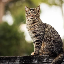

In [33]:
test_image

In [36]:
test_image=tf.keras.utils.img_to_array(test_image)

In [37]:
test_image

array([[[113.,  78.,  58.],
        [124.,  89.,  69.],
        [154., 121., 102.],
        ...,
        [127., 120.,  68.],
        [176., 168., 131.],
        [198., 192., 166.]],

       [[123.,  89.,  64.],
        [131.,  97.,  72.],
        [152., 120.,  97.],
        ...,
        [136., 129.,  75.],
        [128., 122.,  74.],
        [178., 176., 135.]],

       [[136., 100.,  74.],
        [145., 109.,  83.],
        [141., 105.,  79.],
        ...,
        [133., 126.,  74.],
        [140., 134.,  84.],
        [168., 165., 122.]],

       ...,

       [[ 32.,  28.,  29.],
        [ 23.,  19.,  20.],
        [ 29.,  25.,  26.],
        ...,
        [  9.,   9.,  11.],
        [ 12.,  12.,  14.],
        [  0.,   0.,   0.]],

       [[ 36.,  32.,  33.],
        [ 36.,  32.,  33.],
        [ 18.,  14.,  15.],
        ...,
        [  2.,   2.,   4.],
        [ 63.,  63.,  65.],
        [ 74.,  74.,  74.]],

       [[ 63.,  59.,  56.],
        [ 93.,  85.,  83.],
        [ 76.,  

In [38]:
test_image=np.expand_dims(test_image,axis=0)
test_image

array([[[[113.,  78.,  58.],
         [124.,  89.,  69.],
         [154., 121., 102.],
         ...,
         [127., 120.,  68.],
         [176., 168., 131.],
         [198., 192., 166.]],

        [[123.,  89.,  64.],
         [131.,  97.,  72.],
         [152., 120.,  97.],
         ...,
         [136., 129.,  75.],
         [128., 122.,  74.],
         [178., 176., 135.]],

        [[136., 100.,  74.],
         [145., 109.,  83.],
         [141., 105.,  79.],
         ...,
         [133., 126.,  74.],
         [140., 134.,  84.],
         [168., 165., 122.]],

        ...,

        [[ 32.,  28.,  29.],
         [ 23.,  19.,  20.],
         [ 29.,  25.,  26.],
         ...,
         [  9.,   9.,  11.],
         [ 12.,  12.,  14.],
         [  0.,   0.,   0.]],

        [[ 36.,  32.,  33.],
         [ 36.,  32.,  33.],
         [ 18.,  14.,  15.],
         ...,
         [  2.,   2.,   4.],
         [ 63.,  63.,  65.],
         [ 74.,  74.,  74.]],

        [[ 63.,  59.,  56.],
       

In [39]:
result=cnn.predict(test_image)

1/1 [==============================] - 0s 374ms/step


In [41]:
result

array([[3.7081011e-38]], dtype=float32)

In [42]:
if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

In [43]:
print(prediction)

cat
